# Import used modules

In [1]:
import pandas as pd
import sys
sys.path.insert(0, '../src')
import benchmark_utils as bu
import analysis_utils as au

/Users/julian/opt/anaconda3/envs/OpenCADDBenchmark/lib/python3.8/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")


# Run Alignments for OpenCADD.superposition for the TKL Structures

Perform all pairwise alignments for the given sample structures. Every method performs 1225 alignments for the 50 tyrosine kinase like structures. The benchmark is done with an Intel Core i5-1038NG7 CPU and 16 GB of RAM.

In [2]:
#bu.run_alignments(sample1_path="../data/samples/TKL_samples.txt", 
#                  output_path="../data/OpenCADD_results/<NAME_OF_FILE>")

# Create a Dataframe containing the Alignments of all five Methods

The alignments for PyMol and ChimeraX MatchMaker are done in the respectively programs and are saved in seperate files. For the analysis, the DataFrames are combined.

In [3]:
columns = ["reference_id", "mobile_id", "method", "rmsd", 
           "coverage", "reference_size", "mobile_size", "time", 
           "SI", "MI", "SAS", "ref_name", "ref_group", "ref_species", 
           "ref_chain", "mob_name", "mob_group", "mob_species", "mob_chain"]
superposer_TKL_DFGin = pd.read_csv("../data/OpenCADD_results/superposer_benchmark_TKL.csv", names=columns)
pymol_TKL_DFGin = pd.read_csv("../data/PyMol_results/pymol_benchmark_TKL.csv", names=columns)
chimerax_TKL_DFGin = pd.read_csv("../data/ChimeraX_results/mmaker_benchmark_TKL.csv", names=columns)
all_TKL_DFGin = pd.concat([superposer_TKL_DFGin, pymol_TKL_DFGin, chimerax_TKL_DFGin]).reset_index(drop=True)

### Compute the relative Coverage

The relative coverage is computed the following way:

coverage / min(lenght of structure 1, lenght of structure 2)

In [4]:
au.compute_rel_cov(all_TKL_DFGin)

# Analysis

## General Checks

In [5]:
counts, nans, times = au.general_checks(all_TKL_DFGin)

Check if every value is present.
It should be 1225 for every value, because there are 1225 alignments performed per method.

In [6]:
counts

,reference_id,mobile_id,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,ref_name,ref_group,ref_species,ref_chain,mob_name,mob_group,mob_species,mob_chain,rel_cov
method,,,,,,,,,,,,,,,,,,,
matchmaker,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225
mda,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225
mmligner,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225
pymol,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225
theseus,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225


Next, we check for missing alignments. Some Methods have problems with some structures. 

In this case, all alignments worked and there is no alignment missing.

In [7]:
nans

,reference_id,mobile_id,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,ref_name,ref_group,ref_species,ref_chain,mob_name,mob_group,mob_species,mob_chain,rel_cov
method,,,,,,,,,,,,,,,,,,,


During the computation of the alignments, the time is measured.  For all OpenCADD methods combined the CPU-time is just under 4.5 hours. The time for downloading the structures is not included.

In [8]:
times

method
matchmaker     11.77
mda            10.13
mmligner      246.69
pymol           0.42
theseus         7.70
Name: time, dtype: float64

### Compute Mean and Median

In [9]:
mean, median = au.compute_mean_median(all_TKL_DFGin)

In [10]:
mean

,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,rel_cov
method,,,,,,,,,
matchmaker,4.1572,254.0882,286.8547,285.9853,0.5764,4.6542,0.6980,1.6943,0.9165
mda,5.3738,261.0294,286.6384,285.6816,0.4959,5.8187,0.7260,2.1225,0.9430
mmligner,1.6712,235.0751,286.6384,285.6816,12.0830,2.0168,0.5867,0.7350,0.8484
pymol,5.0994,237.6890,286.8547,285.9853,0.0207,6.2750,0.7385,2.2894,0.8567
theseus,5.5944,261.1208,286.6384,285.6816,0.3773,6.0555,0.7318,2.2089,0.9434


In [11]:
median

,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,rel_cov
method,,,,,,,,,
matchmaker,4.1480,245.0,290.0,286.0,0.4730,4.6741,0.7645,1.7356,0.9057
mda,6.3045,255.0,290.0,285.0,0.4807,6.9777,0.8252,2.5321,0.9466
mmligner,1.5790,226.0,290.0,285.0,12.9148,2.0662,0.6238,0.7571,0.8480
pymol,5.4035,232.0,290.0,286.0,0.0202,6.6934,0.8238,2.4522,0.8480
theseus,6.6959,255.0,290.0,285.0,0.3196,7.3239,0.8319,2.6811,0.9472


## Create basic plots

It is easy to see in both plots, that MMLigner performs the best. Besides that, Theseus and MDA perform similar to ChimeraX MatchMaker and PyMol align in terms of the range of RMSD.

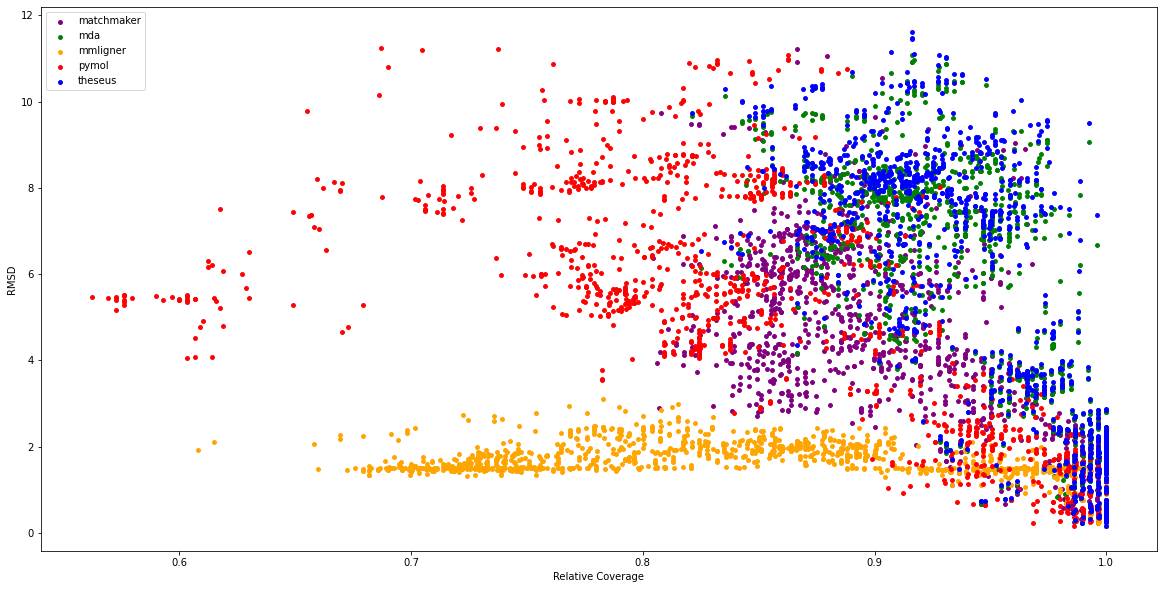

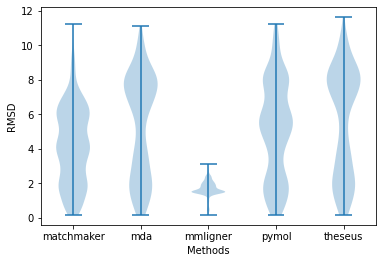

In [12]:
au.create_scatter_plot(all_TKL_DFGin)
au.create_violine_plot(all_TKL_DFGin)

## Check if data is normally distributed

The Kolmogorov-Smirnow-Test shows, that the values for RMSD, SI, MI, SAS and relative coverage are not normally distributed. MMLigner performs the best for all measures except the relative coverage.

Results of kstest:
KstestResult(statistic=0.8085813980329506, pvalue=0.0)
KstestResult(statistic=0.8124138694853991, pvalue=0.0)
KstestResult(statistic=0.5899296088625003, pvalue=0.0)
KstestResult(statistic=0.5845530409070806, pvalue=0.0)


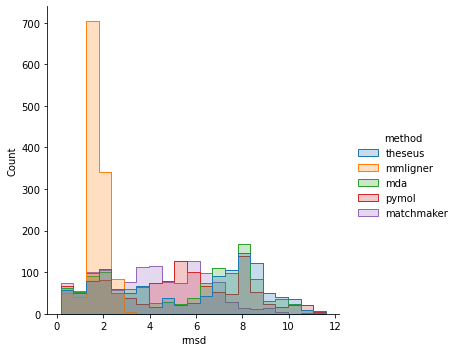

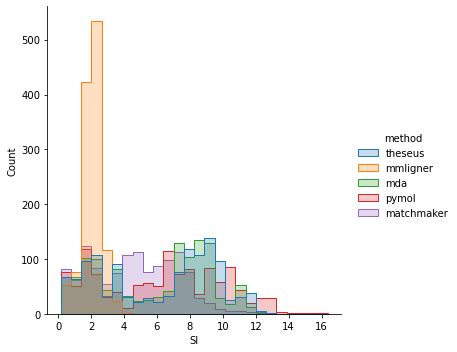

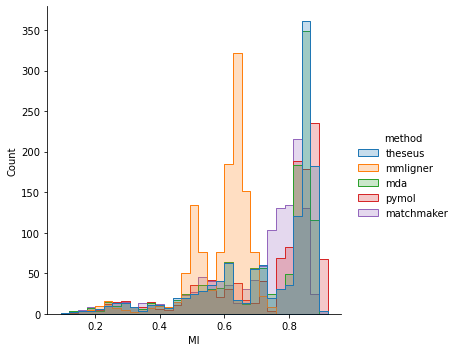

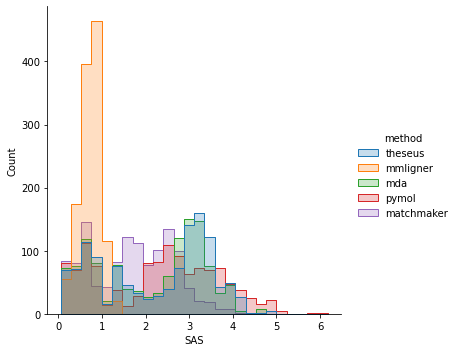

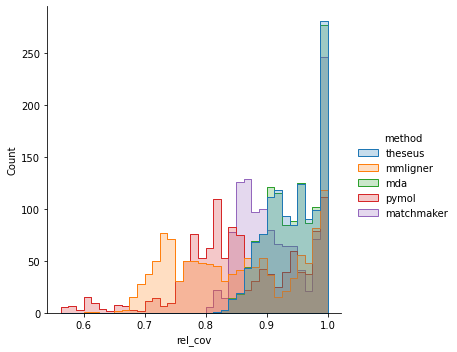

In [13]:
dist_tests = au.check_distribution(all_TKL_DFGin)

## Compute Correlation

Since the data is not distributed normally, the spearman correlation is used.

The three quality measures correlate very well with each other and with the rmsd. The quality measures also negatively correlate with the relative coverage, which means, the lower the relative coverage, the higher the quality measures. 

The time also negatively correlates with the quality measures, which means taking more time for an alignment produces better results. This correlation in this case is highly biased by MMLigner. It takes much more time than the other methods, but also yield overall the best results.

All three quality measures share the property, that lower values mean better alignments.

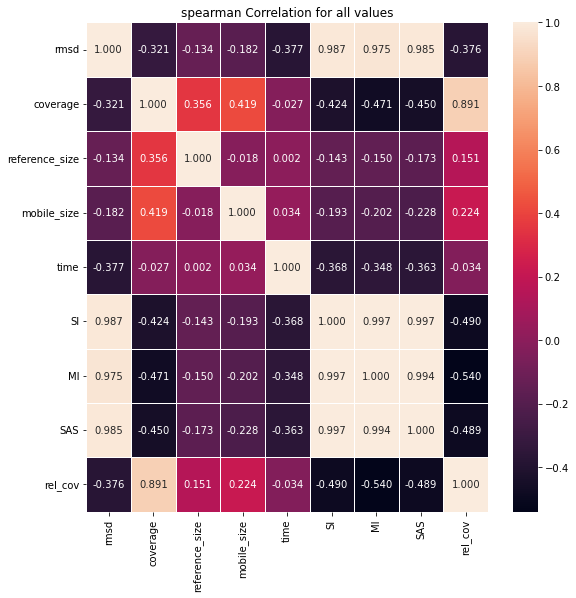

,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,rel_cov
rmsd,1.000000,-0.320918,-0.134177,-0.181813,-0.377262,0.987277,0.974766,0.985331,-0.376365
coverage,-0.320918,1.000000,0.355802,0.418756,-0.026686,-0.423753,-0.470757,-0.449613,0.890769
reference_size,-0.134177,0.355802,1.000000,-0.017786,0.002488,-0.143176,-0.150099,-0.172762,0.151239
mobile_size,-0.181813,0.418756,-0.017786,1.000000,0.034357,-0.193377,-0.202246,-0.227651,0.223612
time,-0.377262,-0.026686,0.002488,0.034357,1.000000,-0.368393,-0.348490,-0.363380,-0.034427
SI,0.987277,-0.423753,-0.143176,-0.193377,-0.368393,1.000000,0.996607,0.996957,-0.489613
MI,0.974766,-0.470757,-0.150099,-0.202246,-0.348490,0.996607,1.000000,0.994114,-0.539734
SAS,0.985331,-0.449613,-0.172762,-0.227651,-0.363380,0.996957,0.994114,1.000000,-0.489283
rel_cov,-0.376365,0.890769,0.151239,0.223612,-0.034427,-0.489613,-0.539734,-0.489283,1.000000


In [14]:
corr = au.compute_correlation(all_TKL_DFGin, coeff="spearman")
corr

## Check for significant differences

Because the data is not normally distributed, an ANOVA is not suitable. Therefore the Kruskal-Wallis-Test is performed. The RMSD and the three quality measures are significantly different for the groups.

In [15]:
kruskal = au.compute_kruskal(all_TKL_DFGin)

Kruskal Wallis results for RMSD:
KruskalResult(statistic=1543.7748898186521, pvalue=0.0)


Kruskal Wallis results for Similarity Index (SI):
KruskalResult(statistic=1227.6807660695204, pvalue=1.5895392748660741e-264)


Kruskal Wallis results for Match Index (MI):
KruskalResult(statistic=1042.7032265418225, pvalue=1.9853366753798857e-224)


Kruskal Wallis results for Structural Alignment Score (SAS):
KruskalResult(statistic=1164.6753165015502, pvalue=7.242498786411368e-251)


## Which groups are different

The statistics show, that all groups are significantly different from each other.

In [16]:
significant, non_significant = au.compute_mannwhitneyu(all_TKL_DFGin)

All significant results:
Result for rmsd with theseus and pymol:
MannwhitneyuResult(statistic=838485.5, pvalue=4.744888555437605e-07)
Result for rmsd with theseus and mmaker:
MannwhitneyuResult(statistic=970278.0, pvalue=3.32020271449796e-36)
Result for rmsd with theseus and mmligner:
MannwhitneyuResult(statistic=1285178.5, pvalue=5.456814506188589e-205)
Result for rmsd with theseus and mda:
MannwhitneyuResult(statistic=795872.0, pvalue=0.00926012943440983)
Result for rmsd with pymol and mmaker:
MannwhitneyuResult(statistic=900147.5, pvalue=1.144029697187597e-17)
Result for rmsd with pymol and mmligner:
MannwhitneyuResult(statistic=1267389.0, pvalue=1.0221940202736628e-191)
Result for rmsd with pymol and mda:
MannwhitneyuResult(statistic=695901.0, pvalue=0.0018841017399726945)
Result for rmsd with mmaker and mmligner:
MannwhitneyuResult(statistic=1250807.5, pvalue=9.495038600379956e-180)
Result for rmsd with mmaker and mda:
MannwhitneyuResult(statistic=551754.0, pvalue=8.17367355637326

# Count the best alignments

For every pair of structures, the method that has the best quality measure is selected. The following statistics show how often a method had the best results for the quality measures.

In [17]:
best_results = au.count_best_results(all_TKL_DFGin)

Counts of best values for the Similarity Index (SI):
mmligner      1103
matchmaker      90
mda             30
pymol           16
Name: method, dtype: int64


Counts of best values for the Match Index (MI):
mmligner      1100
matchmaker      77
mda             30
pymol           18
Name: method, dtype: int64


Counts of best values for the Structural Alignment Score (SAS):
mmligner      1100
matchmaker      82
mda             28
pymol           17
Name: method, dtype: int64


Counts of best values for the Similarity Index (SI) without MMLigner:
matchmaker    867
mda           220
pymol         136
theseus         3
Name: method, dtype: int64


Counts of best values for the Match Index (MI) without MMLigner:
matchmaker    865
mda           238
pymol         119
theseus         3
Name: method, dtype: int64


Counts of best values for the Structural Alignment Score (SAS) without MMLigner:
matchmaker    866
mda           219
pymol         138
theseus         3
Name: method, dtype: int64
